for x= [[30000]] y= [[5.66666667]]


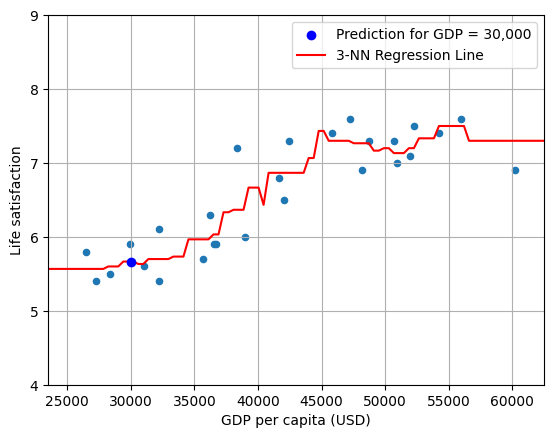

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Download and prepare the data
data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")
X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values

# Visualize the data
lifesat.plot(kind='scatter', grid=True,
             x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])
# plt.show() # dont show yet, bc we want to show regression line 


# Select a 3-Nearest Neighbors regression model
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor( n_neighbors=3 )

# Train the model
model.fit(X, y)



# Make new prediction
X_new = [[30000]]  # new data for prediction
y_new = model.predict(X_new) # prediction 
print(f"for x= {X_new} y= {y_new}") # outputs [[6.30165767]]

# Show the predicted point on the plot
plt.scatter(X_new, y_new, color='blue', label=f'Prediction for GDP = 30,000', zorder=5)

# Optionally, plot the model's prediction over the entire range of data
X_range = np.linspace(23_500, 62_500, 100).reshape(-1, 1)  # Generate a smooth range of GDP values
y_range = model.predict(X_range)  # Predicted life satisfaction for each GDP value

plt.plot(X_range, y_range, color='red', label='3-NN Regression Line')  # Plot the regression curve

# Show legend
plt.legend()

# Show the plot
plt.show()